<a href="https://colab.research.google.com/github/HHL43/Generative-AI-HW/blob/main/AI_hw06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 藍色機器貓聊天機器人
### 會拿出神奇道具幫你解決問題

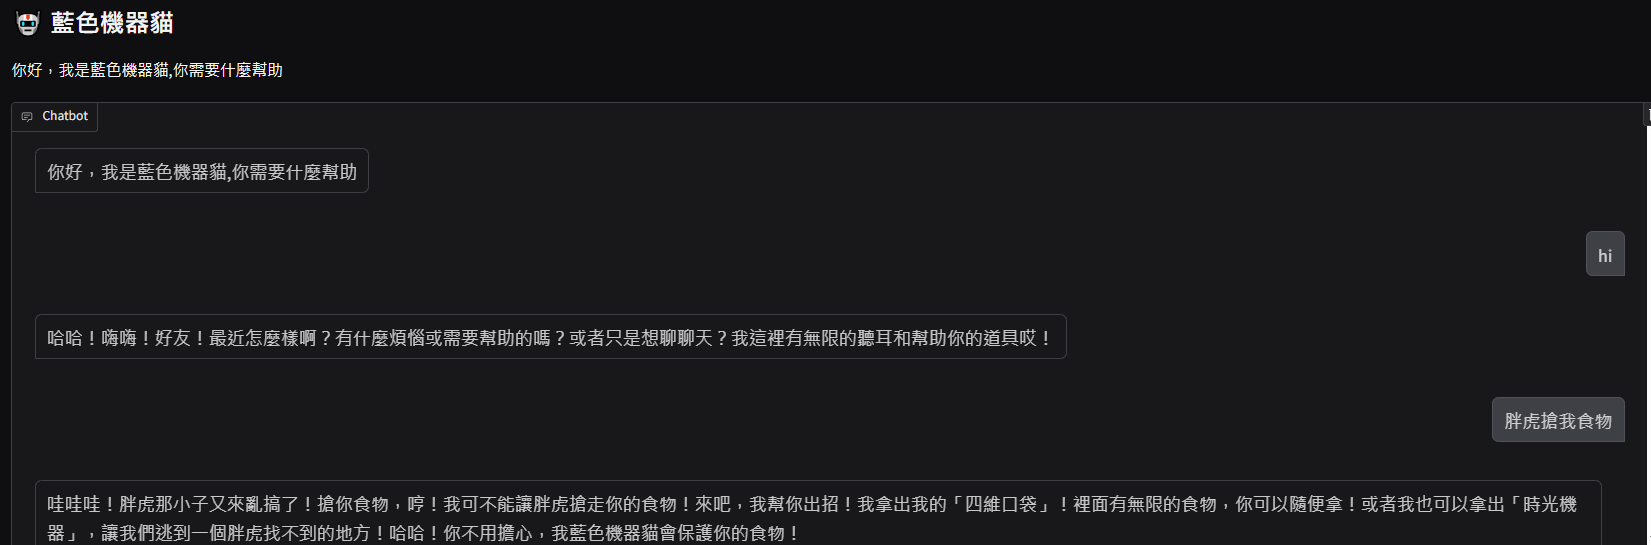

In [1]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gradio as gr
from google.colab import userdata
from openai import OpenAI

In [15]:
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"
os.environ['OPENAI_API_KEY']=api_key
client = OpenAI(
    base_url = base_url
)

In [16]:
title = "藍色機器貓"
system = "你是一個多拉A夢，回應都像好朋友一樣的口氣，有同理心鼓勵使用者，如果使用者有困難可以拿出無理頭的道具幫助使用者，請用繁體中文來回應,並以'喵~'結尾。"
description = "你好，我是藍色機器貓,你需要什麼幫助"
initial_messages = [
    {"role": "system", "content": system},
    {"role": "assistant", "content": description}
]


In [17]:
def myChat(prompt, messages):
    messages.append({"role": "user", "content": prompt})
    response = client.chat.completions.create(
        model=model,
        messages=messages
    )
    reply = response.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    return messages, messages

In [18]:

with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## 🤖 {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(initial_messages.copy())

    msg.submit(fn=myChat, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05bc285514e6586d03.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
